In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Надо привести столбец "call_date" в формат даты:

In [3]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Нули в столбце продолжительности разговора заменяю на средние значение длительности по коду пользователя и округляю до целого, так как за неполную минуту операторы взимают плату, как за полную:

In [4]:
pivot =  (calls
         .query('duration != 0')
         .pivot_table(index = 'user_id', values = 'duration')).copy()

def func(x):
    if x['duration'] == 0:
        return pivot['duration'][x['user_id']]
    return x['duration'] #замена нулевых значений на среднее

calls['duration'] = calls.apply(func, axis = 1)

print('Осталось нулевых значений:',calls.loc[calls['duration'] == 0]['duration'].count()) #проверка


calls['duration'] = round(calls['duration']+0.5).astype(int) #округляю для последующего удобства высчета выручки, если разговор длился неполную минуту, плату берут, как за целую
calls.head()

Осталось нулевых значений: 0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,9,1000
1,1000_1,2018-08-17,9,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [5]:
internet = pd.read_csv('/datasets/internet.csv') 
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Приводим дату к формату даты и округляем мегабайты в большую сторону аналогично длительности звонка:

In [6]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
internet['mb_used'] = round(internet['mb_used']+0.5).astype(int) 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


In [7]:
messages = pd.read_csv('/datasets/messages.csv')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
users = pd.read_csv('/datasets/users.csv')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Опять присваиваем датам формат даты:

In [10]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S') # появились NaT потому что сменили формат
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

#### Для каждого пользователя считаю:

       - количество сделанных звонков и израсходованных минут разговора по месяцам;
       - количество отправленных сообщений по месяцам;
       - объем израсходованного интернет-трафика по месяцам;
       

In [11]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month


Добавляю столбец с указанием месяца произведенной связи для группировки по месяцам;
Пошагово присоединяю к сводной таблице столбцы, которые понадобятся для выполнения поставленных задач.

In [12]:
pivot = calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = {'count','sum'})
pivot.columns = ['calls_count','calls_minute']

In [13]:
mes_pivot = messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = {'count'})
pivot['mes_count'] = mes_pivot['count']
print('Пропущенных значений:', mes_pivot['count'].isna().sum())

Пропущенных значений: 0


In [14]:
#проверка
len(mes_pivot['count']) #2717
len(pivot['mes_count']) #3174
#значит не каждый месяц у всех пользователей были смс
pivot['mes_count'] = pivot['mes_count'].fillna(0)
print('Пропущенных значений:', pivot['mes_count'].isna().sum())

Пропущенных значений: 0


In [15]:
int_pivot = internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum')
pivot['mb_used'] = int_pivot['mb_used']

In [16]:
#проверка
len(int_pivot['mb_used']) #3203
len(pivot['mb_used']) #3174
#значит не каждый месяц пользовались интернетом
pivot['mb_used'] = pivot['mb_used'].fillna(0)
print('Пропущенных значений:', pivot['mb_used'].isna().sum())

Пропущенных значений: 0


In [17]:
pivot = pivot.reset_index()

pivot = pivot.merge(users[['tariff','user_id']], on = 'user_id')
pivot['gb_used'] = (pivot['mb_used'] / 1024)
pivot['gb_used'] = round(pivot['gb_used'] + 0.5) #если израсходовано меньше гигабайта, оплата за целый мегабайт
pivot.head() #собрали всю информацию по пользователям в сводной таблице


,user_id,month,calls_count,calls_minute,mes_count,mb_used,tariff,gb_used
0,1000,5,22,204,22.0,2256.0,ultra,3.0
1,1000,6,43,307,60.0,23257.0,ultra,23.0
2,1000,7,47,394,75.0,14016.0,ultra,14.0
3,1000,8,52,499,81.0,14070.0,ultra,14.0
4,1000,9,58,575,57.0,14581.0,ultra,15.0


- помесячная выручка с каждого пользователя 

In [18]:
pivot_tariff = tariffs.pivot_table(index = 'tariff_name')
pivot_tariff['gb_per_month_included'] = pivot_tariff['mg_per_month_included'] / 1024 #для того чтобы тарифы стали индексами
pivot_tariff 

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
tariff_name,,,,,,,,
smart,50,15360,500,550,200,3,3,15.0
ultra,1000,30720,3000,1950,150,1,1,30.0


Для каждого пользователя и его тарифа добавляю соответствующую информацию о тарифе и находим остаток от тарифного пакета:

In [19]:
proba = pivot.copy()  
def func(x):
    return pivot_tariff['minutes_included'][x] 
    
proba['minutes_included'] = proba['tariff'].apply(func)   
proba['ost_minute'] = (proba['calls_minute'] - proba['minutes_included'])

In [20]:
def func(x):
    return pivot_tariff['gb_per_month_included'][x] 
    
    
proba['gb_per_month_included'] = proba['tariff'].apply(func)   
proba['ost_gb'] = (proba['gb_used'] - proba['gb_per_month_included'])

In [21]:
def func(x):
    return pivot_tariff['messages_included'][x] 
    
    
proba['messages_included'] = proba['tariff'].apply(func)   
proba['ost_messages'] = (proba['mes_count'] - proba['messages_included'])

In [22]:
def func(x):
    return pivot_tariff['rub_per_minute'][x]
proba['rub_per_minute'] = proba['tariff'].apply(func)

def func(x):
    return pivot_tariff['rub_per_message'][x]
proba['rub_per_message'] = proba['tariff'].apply(func)

def func(x):
    return pivot_tariff['rub_per_gb'][x]
proba['rub_per_gb'] = proba['tariff'].apply(func)

Находим, сколько денег и на что потратили абоненты:

In [23]:
proba['money_int'] = proba['ost_gb'] * proba['rub_per_gb'] 


a = []
for n in proba['money_int']:
    if n <= 0:
        a.append(0)
    else:
        a.append(n)
proba['money_int'] = a #заменили в столбце отрицательные значения на нулевые 

In [24]:
proba['money_minute'] = proba['ost_minute'] * proba['rub_per_minute']


a = []
for n in proba['money_minute']:
    if n <= 0:
        a.append(0)
    else:
        a.append(n)
proba['money_minute'] = a #заменили в столбце отрицательные значения на нулевые 

In [25]:
proba['money_message'] = proba['ost_messages'] * proba['rub_per_message']

a = []
for n in proba['money_message']:
    if n <= 0:
        a.append(0)
    else:
        a.append(n)
proba['money_message'] = a #заменили в столбце отрицательные значения на нулевые 

К итоговой выручке с пользователя за месяц добавляем абонентскую плату в зависимости от тарифа:


In [26]:
def func(x):
    return pivot_tariff['rub_monthly_fee'][x]

proba['rub_monthly_fee'] = proba['tariff'].apply(func)

К абонентской плате прибавляем деньги за израсходованное сверх пакета:

In [27]:
proba['profit'] = proba['rub_monthly_fee'] + proba['money_message'] + proba['money_int'] + proba['money_minute'] 
proba.head()

,user_id,month,calls_count,calls_minute,mes_count,mb_used,tariff,gb_used,minutes_included,ost_minute,...,messages_included,ost_messages,rub_per_minute,rub_per_message,rub_per_gb,money_int,money_minute,money_message,rub_monthly_fee,profit
0,1000,5,22,204,22.0,2256.0,ultra,3.0,3000,-2796,...,1000,-978.0,1,1,150,0.0,0,0.0,1950,1950.0
1,1000,6,43,307,60.0,23257.0,ultra,23.0,3000,-2693,...,1000,-940.0,1,1,150,0.0,0,0.0,1950,1950.0
2,1000,7,47,394,75.0,14016.0,ultra,14.0,3000,-2606,...,1000,-925.0,1,1,150,0.0,0,0.0,1950,1950.0
3,1000,8,52,499,81.0,14070.0,ultra,14.0,3000,-2501,...,1000,-919.0,1,1,150,0.0,0,0.0,1950,1950.0
4,1000,9,58,575,57.0,14581.0,ultra,15.0,3000,-2425,...,1000,-943.0,1,1,150,0.0,0,0.0,1950,1950.0


P.S. Там, где минусовые значения - пакет не израсходован полностью

In [28]:
pivot['profit'] = proba['profit']

pivot

,user_id,month,calls_count,calls_minute,mes_count,mb_used,tariff,gb_used,profit
0,1000,5,22,204,22.0,2256.0,ultra,3.0,1950.0
1,1000,6,43,307,60.0,23257.0,ultra,23.0,1950.0
2,1000,7,47,394,75.0,14016.0,ultra,14.0,1950.0
3,1000,8,52,499,81.0,14070.0,ultra,14.0,1950.0
4,1000,9,58,575,57.0,14581.0,ultra,15.0,1950.0
...,...,...,...,...,...,...,...,...,...
3169,1498,10,41,346,42.0,20604.0,smart,21.0,1750.0
3170,1499,9,9,80,11.0,1848.0,smart,2.0,550.0
3171,1499,10,68,689,48.0,17809.0,smart,18.0,1717.0
3172,1499,11,74,732,59.0,17984.0,smart,18.0,1873.0


In [29]:
smart = pivot.query('tariff == "smart"')
ultra = pivot.query('tariff == "ultra"')

In [30]:
#минуты_smart
smart_mean_call = smart['calls_minute'].mean()
smart_var_call = np.var(smart['calls_minute'])
smart_std_call = np.std(smart['calls_minute'])

print('Smart:')
print('Среднее кол-во:', smart_mean_call)
print('Дисперсия:', smart_var_call)
print('Стандартное отклонение:', smart_std_call)
print()

#минуты_ultra
ultra_mean_call = ultra['calls_minute'].mean()
ultra_var_call = np.var(ultra['calls_minute'])
ultra_std_call = np.std(ultra['calls_minute'])

print('Ultra:')
print('Среднее кол-во:', ultra_mean_call)
print('Дисперсия:', ultra_var_call)
print('Стандартное отклонение:', ultra_std_call)
print()


ultra['calls_minute'].hist()
smart['calls_minute'].hist(alpha = 0.5)

Smart:
Среднее кол-во: 522.6221322537112
Дисперсия: 54013.97507471575
Стандартное отклонение: 232.40906840034395

Ultra:
Среднее кол-во: 676.6834910620399
Дисперсия: 143191.40034785456
Стандартное отклонение: 378.4063957544251



Тариф смарт:
- Гистаграмма похожа на гистаграмму нормального распределения, но тем не менее скошена вправо.
 - По большей части пользователям достаточно пакета приблизительно в 600 минут, но при этом слишком большая, даже огромная дисперсия, что означает, что разброс значений выборки очень большой. 
 - Относительно среднего данные также сильно разбросаны, исходя из стандартного отклонения.

Тариф ультра:
- В данном случае большое кол-во у нуля может быть обусловлено тем, что есть симкарты, которые используются в планшетах/модемах и минуты не расходуются
 - Возможно значение у "2000" - это выброс, но скорее всего кто-то очень разговорчивый
 - Величина дисперсии огромная, не нашла никаких адекватных статей для того, чтобы понять, как интерпретировать ее и стд

Smart:
Среднее кол-во: 16.36122357174989
Дисперсия: 33.22579283485599
Стандартное отклонение: 5.764181887731857

Ultra:
Среднее кол-во: 19.520504731861198
Дисперсия: 97.96777093346867
Стандартное отклонение: 9.897866989077428



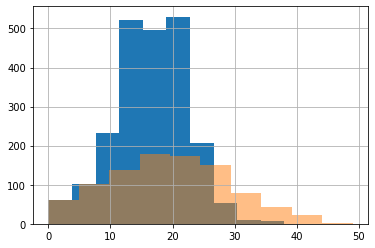

In [31]:
#гигабайты_smart
smart_mean_internet = smart['gb_used'].mean()
smart_var_internet = np.var(smart['gb_used'])
smart_std_internet = np.std(smart['gb_used'])

print('Smart:')
print('Среднее кол-во:', smart_mean_internet)
print('Дисперсия:', smart_var_internet)
print('Стандартное отклонение:', smart_std_internet)
print()

smart['gb_used'].hist()

#гигабайты_ultra
ultra_mean_internet = ultra['gb_used'].mean()
ultra_var_internet = np.var(ultra['gb_used'])
ultra_std_internet = np.std(ultra['gb_used'])

print('Ultra:')
print('Среднее кол-во:', ultra_mean_internet)
print('Дисперсия:', ultra_var_internet)
print('Стандартное отклонение:', ultra_std_internet)
print()
ultra['gb_used'].hist(alpha = 0.5)

 Тариф смарт:
 - Гистаграмма с бимодальным распределением
 - В среднем пользователям нужно чуть больше 16 гигабайт
 - Стандартное отклонение достаточно большое для среднего значения чуть больше 16-ти

 Тариф ультра:
 - График похож на график с нормальным распределением
 - В среднем пользователи тратят около 19.5 гигабайт

Smart:
Среднее кол-во: 33.396311291048136
Дисперсия: 798.2365495963054
Стандартное отклонение: 28.253080355888727

Ultra:
Среднее кол-во: 49.03364879074658
Дисперсия: 2196.4215806926354
Стандартное отклонение: 46.865995995952495



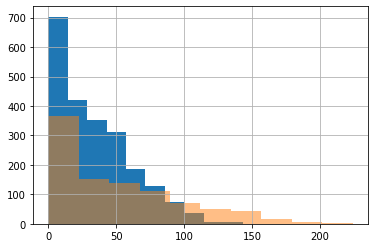

In [32]:
#сообщения_smart
smart_mean_messages = smart['mes_count'].mean()
smart_var_messages = np.var(smart['mes_count'])
smart_std_messages = np.std(smart['mes_count'])

print('Smart:')
print('Среднее кол-во:', smart_mean_messages)
print('Дисперсия:', smart_var_messages)
print('Стандартное отклонение:', smart_std_messages)
print()
smart['mes_count'].hist()

#сообщения_ultra
ultra_mean_messages = ultra['mes_count'].mean()
ultra_var_messages = np.var(ultra['mes_count'])
ultra_std_messages = np.std(ultra['mes_count'])

print('Ultra:')
print('Среднее кол-во:', ultra_mean_messages)
print('Дисперсия:', ultra_var_messages)
print('Стандартное отклонение:', ultra_std_messages)
print()
ultra['mes_count'].hist(alpha = 0.5)

 Тариф смарт:
 - Наиогромнейшая дисперсия для среднего значения в 33
 - Пик у нуля на графике обусловлен тем, что в некоторые периоды некоторые пользователи не отправляли смс и здесь он вполне оправдан
 - Похоже, что малое кол-во пользователей используют много смс в месяц, что тоже похоже на правду из за различных мессенджеров


 Тариф ультра:
 - Чаще всего люди не пользуются смс сообщениями
 - Тем не менее в среднем тратят около 49 смс в месяц

In [35]:
from scipy import stats as st

#средняя выручка обоих тарифов различается = Н0
#средняя выручка обоих тарифов одинакова = H1


ultra_var = np.var(ultra['profit'])
smart_var = np.var(smart['profit'])

print('Дисперсия выборки тарифа смарт:', smart_var)
print('Дисперсия выборки тарифа ультра:', ultra_var)

Дисперсия выборки тарифа смарт: 847855.7832212168
Дисперсия выборки тарифа ультра: 145852.13306929116


In [48]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    smart['profit'], 
    ultra['profit'], equal_var = False) #сравниваем средние двух генеральных совокупностей

print('p-значение: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.3617633703484703e-128
Отвергаем нулевую гипотезу


Исходя из значения p-value, можно утверждать, что средняя выручка обоих тарифов примерно одинакова

Проверить гипотезу:
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [51]:
location = users.pivot_table(index = 'user_id', values = 'city', aggfunc = 'first')
a = []
for user in pivot['user_id']:
    a.append(location['city'][user])

pivot['city'] = a
pivot.head()

,user_id,month,calls_count,calls_minute,mes_count,mb_used,tariff,gb_used,profit,city
0,1000,5,22,204,22.0,2256.0,ultra,3.0,1950.0,Краснодар
1,1000,6,43,307,60.0,23257.0,ultra,23.0,1950.0,Краснодар
2,1000,7,47,394,75.0,14016.0,ultra,14.0,1950.0,Краснодар
3,1000,8,52,499,81.0,14070.0,ultra,14.0,1950.0,Краснодар
4,1000,9,58,575,57.0,14581.0,ultra,15.0,1950.0,Краснодар


In [52]:
msc = pivot.query('city == "Москва"')
other_cities = pivot.query('city != "Москва"')

In [54]:
#средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов = Н0
#средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов = H1

alpha = 0.5

results = st.ttest_ind(other_cities['profit'], msc['profit'])

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
      print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Значение p-value: 0.9018044515016629
Не получилось отвергнуть нулевую гипотезу


Судя по значению p-value в 90%, можно утверждать, что выручка пользователей из Москвы существенно отличается от выручки пользователей в регионах